In [38]:
#Reading Data from CSV
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Downloads/time_series_covid19_confirmed_US.csv')
df = df.iloc[:,6:]
df.drop(columns = ['Lat','Long_','Combined_Key', 'Country_Region'],axis = 1,inplace = True)
df = df.groupby(['Province_State']).sum()
country  = df.transpose()
country = country.reset_index()
country['index'] = country['index'].apply(pd.to_datetime)
country = country.set_index(['index'])
 

#Transposing data and finding sum for US across different states and dates
country.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
index,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-26,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


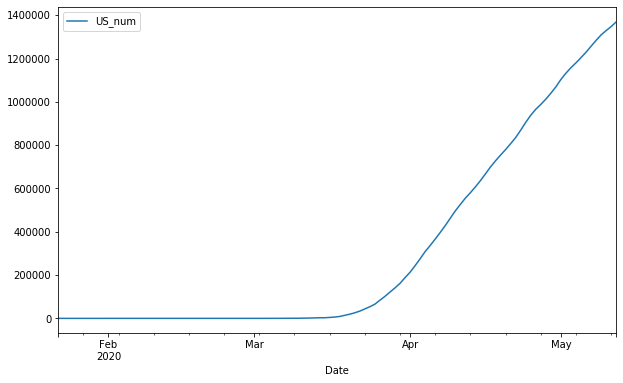

In [127]:
#Reading Data from CSV

import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('Downloads/time_series_covid19_confirmed_US.csv')
df = df.iloc[:,7:]
df.drop(columns = ['Lat','Long_','Combined_Key'],axis = 1,inplace = True)

 

#Transposing data and finding sum for US across different states and dates
country = df.transpose()
country = country.reset_index()

 

country.columns = country.iloc[0]
country=country.iloc[1:,:].reset_index()
country.head(5)

 

sum_us=list(country.iloc[:,2:].sum(axis = 1))
US_data = pd.DataFrame()
US_data['Date']=country['Country_Region']
US_data['US_num']=sum_us

US_data['US_num'] = US_data['US_num'].astype(int)
US_data=US_data.set_index(US_data['Date'])
US_data.drop(columns = 'Date',inplace=True)

 

US_data.index = pd.to_datetime(US_data.index)
US_data.index
US_data.index.freq='D'
US_data.head()


US_data.plot(figsize = (10,6));


Removing trend from the data

In [97]:
from pmdarima.arima.stationarity import ADFTest
import pmdarima as pm


# Test whether we should difference at the alpha=0.05
# significance level
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(US_data)  # (0.01, False)

print(p_val, should_diff)

0.16562096526306352 True


Making data stationary by using difference method

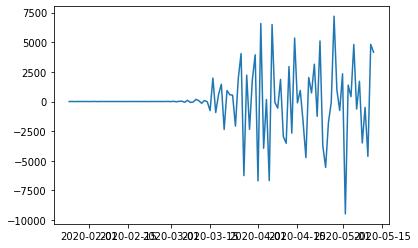

In [131]:
from statsmodels.tsa.statespace.tools import diff
US_data['diff1'] = diff(US_data['US_num'],k_diff=3)
pyplot.plot(US_data['diff1'])
pyplot.show()

Decomposing the data into trend, Seasonal and residual components

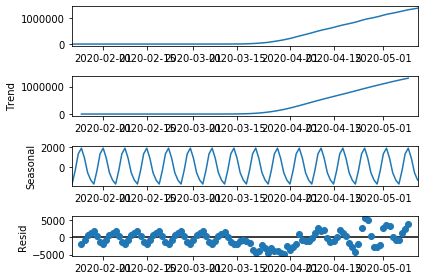

In [137]:
result = seasonal_decompose(US_data, model='additive')
result.plot()
pyplot.show()


Moving Average

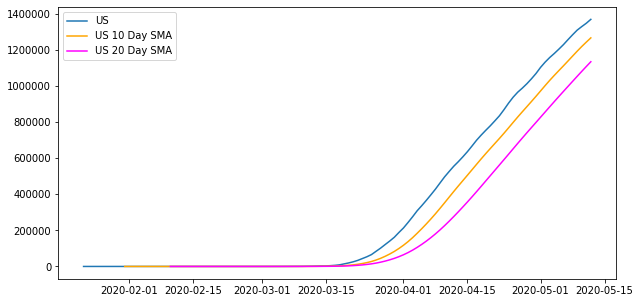

In [89]:
rolling_mean = US_data.rolling(window=10).mean()
rolling_mean2 = US_data.rolling(window=20).mean()
fig= plt.figure(figsize=(10,5)) 
plt.plot(US_data.index, US_data, label='US')
plt.plot(US_data.index, rolling_mean, label='US 10 Day SMA', color='orange')
plt.plot(US_data.index, rolling_mean2, label='US 20 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

# Autocorrelation Plot

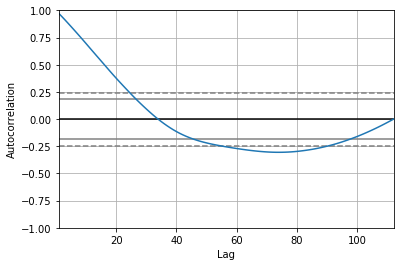

In [90]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(US_data)
plt.show()

In [124]:
import pmdarima as pm


train, test = US_data[:90], US_data[90:]

stepwise_fit = pm.auto_arima(US_data, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1817.427, BIC=1830.403, Time=0.697 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=2060.951, BIC=2066.141, Time=0.012 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1849.698, BIC=1860.079, Time=0.373 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1964.455, BIC=1974.835, Time=0.470 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=2072.687, BIC=2075.282, Time=0.019 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=1848.250, BIC=1858.631, Time=0.056 seconds
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=1819.141, BIC=1834.712, Time=0.788 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(1,1,1)x(0,1,2,12) [intercept=True]; AIC=1818.856, BIC=1834.427, Time=1.639 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  112
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -900.247
Date:                              Fri, 22 May 2020   AIC                           1812.494
Time:                                      11:12:21   BIC                           1828.065
Sample:                                           0   HQIC                          1818.794
                                              - 112                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    299.8423    264.971      1.132      0.258    -219.491     819.176
ar.L1          0.9111      0.057     15.853      0.000       0.798       1.024
ma.L1          0.4230      0.086      4.923      0.000       0.255       0.591
ma.L2          0.3517      0.108      3.262      0.001       0.140       0.563
ma.S.L12      -0.9931      0.118     -8.433      0.000      -1.224      -0.762
sigma2      3.787e+06      0.000   8.67e+09      0.000    3.79e+06    3.79e+06
===================================================================================
Ljung-Box (Q):                      114.99   Jarque-Bera (JB):                 9.53
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):              35.24   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.59e+27. Standard errors may be unstable.
"""

 Applying SARIMAX model for predictions

In [142]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train, order = (0,2,0), seasonal_order = (1,0,[1], 7))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              US_num   No. Observations:                   90
Model:             SARIMAX(0, 2, 0)x(1, 0, [1], 7)   Log Likelihood                -762.777
Date:                             Fri, 22 May 2020   AIC                           1531.554
Time:                                     17:29:06   BIC                           1538.986
Sample:                                 01-22-2020   HQIC                          1534.549
                                      - 04-20-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.5196      0.222      2.345      0.019       0.085       0.954
ma.S.L7       -0.0279      0.250     -0.112      0.911      -0.518       0.462
sigma2      1.945e+06   1.68e+05     11.548      0.000    1.61e+06    2.27e+06
===================================================================================
Ljung-Box (Q):                       46.72   Jarque-Bera (JB):               143.85
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):         2164875.03   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

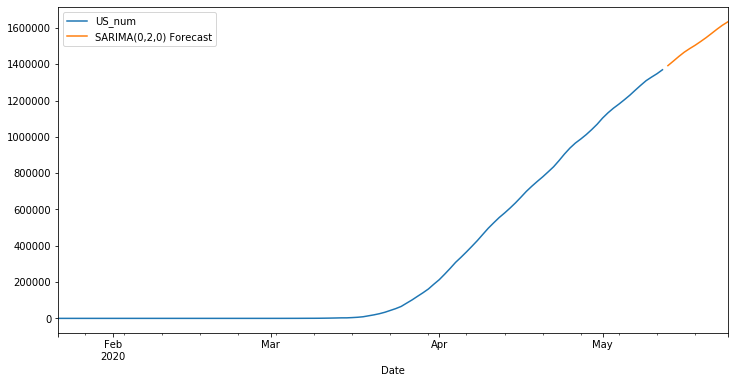

In [156]:
#Forecasting values
from statsmodels.tsa.statespace.sarimax import SARIMAX
start = len(train)
end = len(train) + len(test) -1
model = SARIMAX(US_data['US_num'],order=(0,2,0),seasonal_order=(1,0,[1],7))
results = model.fit()
fcast = results.predict(len(US_data),len(US_data)+11,typ='levels').rename('SARIMA(0,2,0) Forecast')
 
# Plot predictions against known values
ax =US_data['US_num'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True);

 Applying ARIMA model

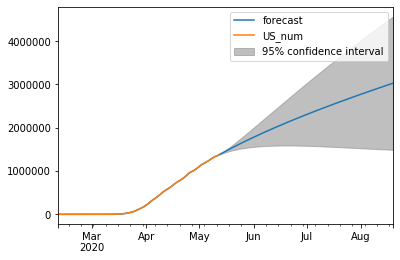

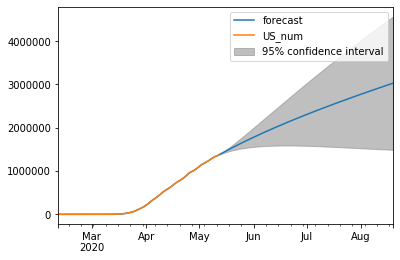

In [123]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(US_data, order=(1, 1, 1))
results = model.fit()
results.plot_predict(20, 210)

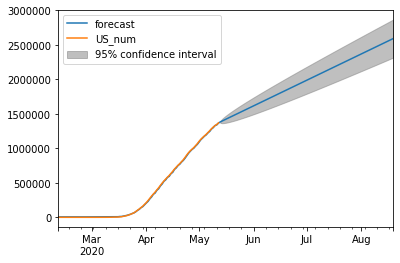

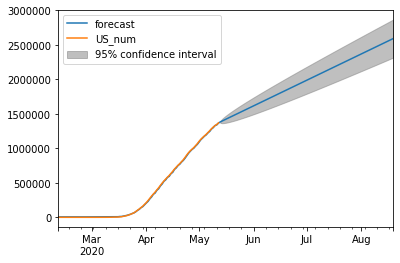

In [111]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(US_data, order=(0, 1, 1))
results = model.fit()
results.plot_predict(20, 210)

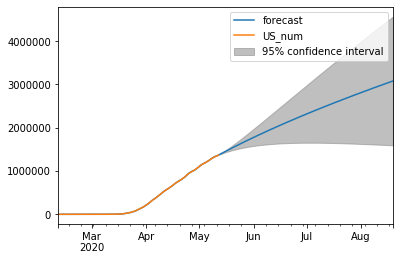

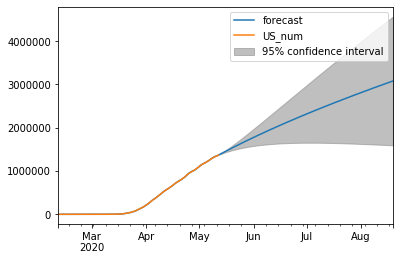

In [112]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(US_data, order=(1, 1, 0))
results = model.fit()
results.plot_predict(20, 210)